Hypothesis
We can predict how many medals a country will win at the Olympics by using historical data.

The Data
A dataset of how many medals each country won at each Olympics. Other data would also be nice (number of athletes, etc).

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
dataset = pd.read_csv('/content/teams.csv')
dataset


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


Removing extra columns out

In [10]:
dataset = dataset[["year", "athletes", "age", "prev_medals", "medals"]]
dataset

,year,athletes,age,prev_medals,medals
0,1964,8,22.0,0.0,0
1,1968,5,23.2,0.0,0
2,1972,8,29.0,0.0,0
3,1980,11,23.6,0.0,0
4,2004,5,18.6,0.0,0
...,...,...,...,...,...
2139,2000,26,25.0,0.0,0
2140,2004,14,25.1,0.0,3
2141,2008,16,26.1,3.0,4
2142,2012,9,27.3,4.0,0


Checking if we can make predictions by correlation between columns

In [11]:
dataset.corr()["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


Plotting columns

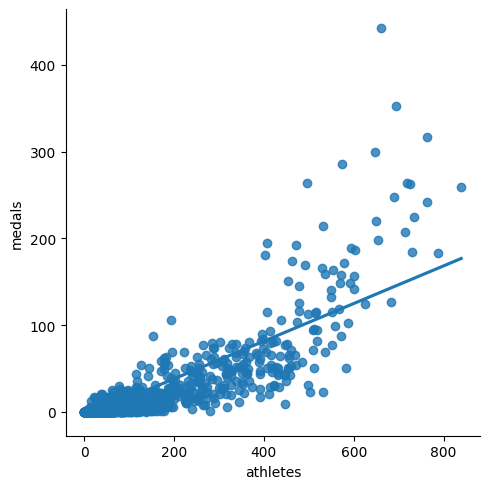

In [13]:
import seaborn as sns
sns.lmplot(x='athletes',y='medals',data=dataset,fit_reg=True, ci=None)

No linear relationship

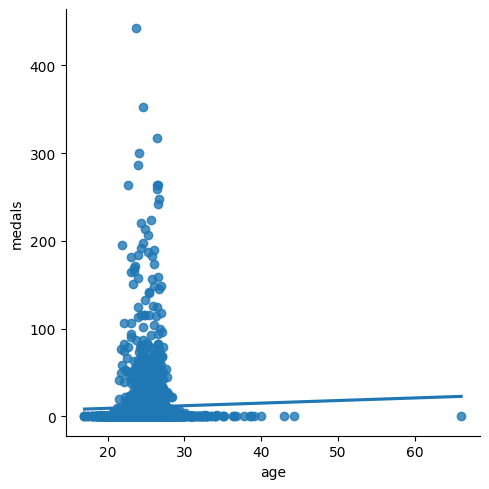

In [15]:
sns.lmplot(x='age', y='medals', data=dataset, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

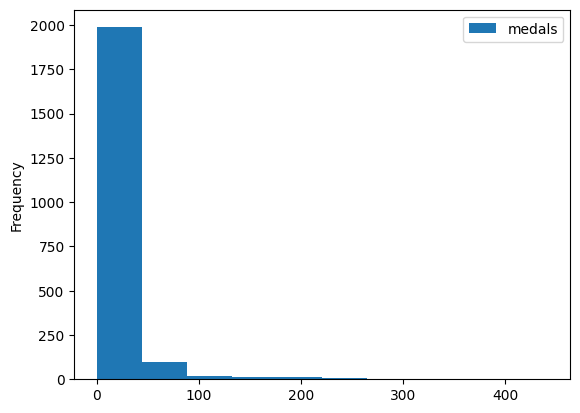

In [16]:
dataset.plot.hist(y="medals")
# imbalance dataset

Data cleaning

In [17]:
# checking for missing values
dataset[dataset.isnull().any(axis=1)].head(20)

,year,athletes,age,prev_medals,medals
19,1992,9,25.3,NaN,0
26,1964,7,26.0,NaN,0
39,1976,3,28.3,NaN,0
50,1980,17,17.4,NaN,0
59,1976,17,23.2,NaN,0
82,1996,38,24.0,NaN,2
88,1988,12,27.8,NaN,0
96,1988,6,27.0,NaN,0
131,1996,24,25.1,NaN,1
150,1984,2,21.0,NaN,0


In [ ]:
# remove null rows
dataset = dataset.dropna()

Split dataset

In [20]:
# this dataset is time series dataset
# Take last 2 years as test dataset remaining as train
dataset.shape

(2144, 5)

In [22]:
train = dataset[dataset["year"] < 2012].copy()
test = dataset[dataset["year"] >= 2012].copy()

80/20 split for train and test

In [23]:
# About 20% of the data
test.shape

(408, 5)

In [24]:
# About 80% of the data
train.shape

(1736, 5)

In [54]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [55]:



# Option 1: Drop rows with NaN values
#train = train.dropna()
#test = test.dropna()

# Option 2: Fill NaN values with the mean of the column
train = train.fillna(train.mean())
test = test.fillna(test.mean())

#  Define the predictors and target
predictors = ["athletes", "prev_medals"]
target = "medals"

#  Separate features (X) and target (y) for training
X_train = train[predictors]
y_train = train[target]

#  Initialize and train the Random Forest model
model_rf = RandomForestRegressor(random_state=42)  # Setting random_state for reproducibility
model_rf.fit(X_train, y_train)

# Separate features (X) for testing
X_test = test[predictors]
y_test = test[target]

# Make predictions
y_pred_rf = model_rf.predict(X_test)


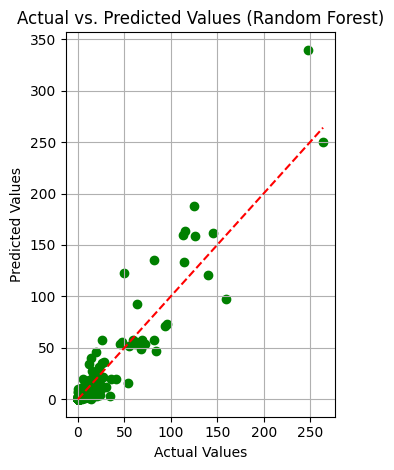

In [56]:

# Plot for Random Forest
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()


Evaluate the model

In [57]:

mae = mean_absolute_error(y_test, y_pred_rf)


# Print evaluation metrics

print('Mean Absolute Error:', mae)


Mean Absolute Error: 3.88926773681149


In [50]:
from sklearn.linear_model import LinearRegression


model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Separate features (X) for testing
X_test = test[predictors]
y_test = test[target]

# Make predictions
y_pred_linear = model_lr.predict(X_test)

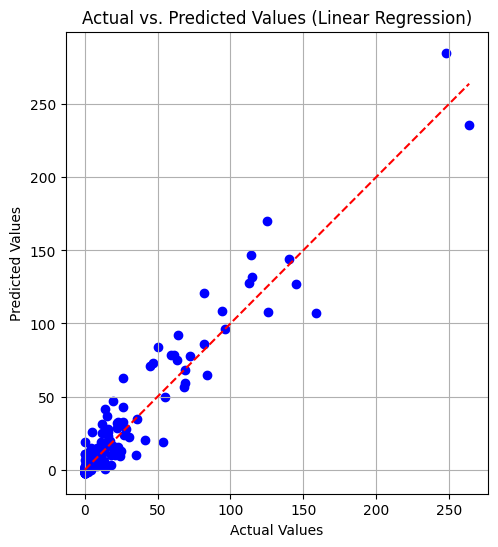

In [53]:
# Plot for Linear Regression

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

In [51]:
# 9. Evaluate the model

mae = mean_absolute_error(y_test, y_pred_linear)
mae

4.195519784672662

The performance comparison between the Linear Regression and Random Forest models reveals that the Random Forest model, with a Mean Absolute Error (MAE) of 3.89, outperforms the Linear Regression model, which has an MAE of 4.20. This indicates that the Random Forest model is better at accurately predicting the number of medals, with predictions deviating less from actual values on average. The lower MAE of the Random Forest suggests it captures the underlying relationships in the data more effectively, making it the preferable choice for this dataset. However, both models present opportunities for further optimization through hyperparameter tuning and feature engineering.